## Predicting the resignation of an employee in a company

## Importing Library pandas for loading Dataset

In [1]:
import pandas as pd

### Reading CSV file

In [2]:
df1 = pd.read_csv("d:\\CSVpython\\HR_data.csv")
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df1.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [4]:
left = df1[df1['left']== 1]
left.shape

(3571, 10)

## 3571 Employees left the company

In [5]:
retained = df1[df1['left']==0]
retained.shape

(11428, 10)

## 11428 Employees preferred to stay in Company

In [6]:
df1.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

1. **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
2. **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
3. **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

<AxesSubplot:xlabel='salary'>

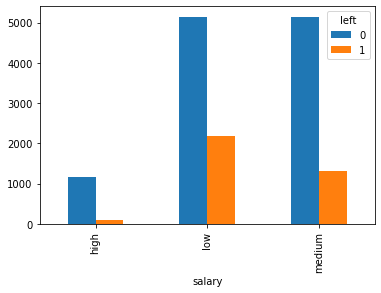

In [7]:
pd.crosstab(df1.salary,df1.left).plot(kind='bar')

#### Above bar chart shows employees with high salaries are likely to not leave the company

<AxesSubplot:xlabel='Department'>

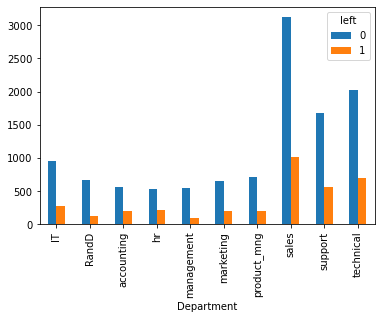

In [8]:
pd.crosstab(df1.Department,df1.left).plot(kind='bar')

#### From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

From the data analysis so far we can conclude that we will use following variables as independant variables in our model
1. **Satisfaction Level**
2. **Average Monthly Hours**
3. **Promotion Last 5 Years**
4. **Salary**

In [9]:
sub_df1 = df1[["satisfaction_level", "average_montly_hours","promotion_last_5years","salary","left"]]
sub_df1

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1
...,...,...,...,...,...
14994,0.40,151,0,low,1
14995,0.37,160,0,low,1
14996,0.37,143,0,low,1
14997,0.11,280,0,low,1


<AxesSubplot:xlabel='satisfaction_level', ylabel='left'>

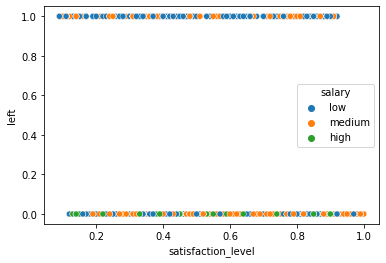

In [10]:
import seaborn as sns
sns.scatterplot(x=sub_df1["satisfaction_level"],y=sub_df1["left"],hue=sub_df1["salary"])

### Above Graph showing Employees leaving Company were having ''low'' salaries mostly

### Encoding Technique used - Dummy Variables
### Though Salaries are categorized as high , medium and low , we use one hot encoding as here assumption is that each employee in analysis is considered equally important.

In [11]:
dummies = pd.get_dummies(sub_df1["salary"] , prefix = "salary")
dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


### Merging dummy variables with working dataset

In [12]:
merged = pd.concat([sub_df1,dummies],axis="columns")
merged

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left,salary_high,salary_low,salary_medium
0,0.38,157,0,low,1,0,1,0
1,0.80,262,0,medium,1,0,0,1
2,0.11,272,0,medium,1,0,0,1
3,0.72,223,0,low,1,0,1,0
4,0.37,159,0,low,1,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,151,0,low,1,0,1,0
14995,0.37,160,0,low,1,0,1,0
14996,0.37,143,0,low,1,0,1,0
14997,0.11,280,0,low,1,0,1,0


In [13]:
final = merged.drop(["salary","salary_low"],axis = "columns")
final

,satisfaction_level,average_montly_hours,promotion_last_5years,left,salary_high,salary_medium
0,0.38,157,0,1,0,0
1,0.80,262,0,1,0,1
2,0.11,272,0,1,0,1
3,0.72,223,0,1,0,0
4,0.37,159,0,1,0,0
...,...,...,...,...,...,...
14994,0.40,151,0,1,0,0
14995,0.37,160,0,1,0,0
14996,0.37,143,0,1,0,0
14997,0.11,280,0,1,0,0


## Assigning Independent Variables

In [14]:
X = final[['satisfaction_level','average_montly_hours','promotion_last_5years','salary_high','salary_medium']]
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_medium
0,0.38,157,0,0,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,0,0
4,0.37,159,0,0,0
...,...,...,...,...,...
14994,0.40,151,0,0,0
14995,0.37,160,0,0,0
14996,0.37,143,0,0,0
14997,0.11,280,0,0,0


## Assigning Dependent Variable

In [15]:
y = final.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

## Splitting Data into train and test parts

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Importing Logistic Regression from Sklearn library and building model

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

## Training Model

In [18]:
model.fit(X_train,  y_train)

LogisticRegression()

In [19]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_medium
9832,0.91,166,0,0,0
12650,0.39,134,0,0,1
4266,0.92,197,0,0,1
5998,0.61,163,0,0,0
3126,0.49,196,0,0,0
...,...,...,...,...,...
7635,0.57,176,0,0,0
1704,0.38,140,0,0,1
8052,0.64,222,0,0,0
12339,0.10,246,0,0,1


In [20]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [21]:
model.score(X_test,y_test)

0.786

### Accuracy of logistic regression model came as 78.6%

In [22]:
predictions = model.predict(X_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions) 
score

0.786

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
cm

array([[2173,  129],
       [ 513,  185]], dtype=int64)

Text(33.0, 0.5, 'Truth')

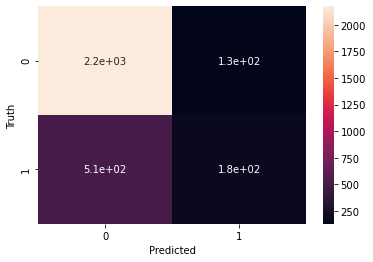

In [24]:
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

## Now , Using Decision Tree model

In [25]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()

In [26]:
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
model1.score(X_test,y_test)

0.923

## Accuracy got increased by using Decision Tree

In [28]:
predictions1 = model1.predict(X_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions1) 
score

0.923

In [29]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,predictions1)
cm1

array([[2169,  133],
       [  98,  600]], dtype=int64)

Text(33.0, 0.5, 'Truth')

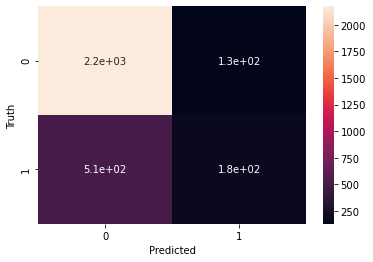

In [30]:
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [31]:
from sklearn import tree

In [32]:
text_representation = tree.export_text(model1)
print(text_representation)

|--- feature_0 <= 0.47
|   |--- feature_0 <= 0.11
|   |   |--- class: 1
|   |--- feature_0 >  0.11
|   |   |--- feature_0 <= 0.36
|   |   |   |--- feature_1 <= 289.00
|   |   |   |   |--- feature_0 <= 0.31
|   |   |   |   |   |--- feature_1 <= 276.50
|   |   |   |   |   |   |--- feature_1 <= 257.50
|   |   |   |   |   |   |   |--- feature_1 <= 134.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  134.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 136.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_1 >  136.00
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.15
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 159.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  159.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- 

## Predicting whether Employee will leave the company or not

In [34]:
a=float(input("Enter Satisfaction Level of Employee:----------"))
b=float(input("Enter Avg. Monthly Hours of Employee:----------"))
c=int(input("Promotion for Last 5 years - Enter 0 for no else 1 :----------"))
d=int(input("Salary in high Category - Enter 0 for no else 1:----------"))
e=int(input("Salary in Medium Category - Enter 0 for no else 1:-----------"))

Enter Satisfaction Level of Employee:----------0.84
Enter Avg. Monthly Hours of Employee:----------201
Promotion for Last 5 years - Enter 0 for no else 1 :----------1
Salary in high Category - Enter 0 for no else 1:----------0
Salary in Medium Category - Enter 0 for no else 1:-----------0


In [35]:
A=[a,b,c,d,e]

In [41]:
ANS=model1.predict([A])
ANS

array([0], dtype=int64)

In [42]:
if ANS == [0] :
    print("Employee will not leave the Company")
else :
    print("Employee will leave the Company")

Employee will not leave the Company
